# Usage (details: policy measures)
Here, we will analyse the relationship of policy measures and parameter values of SIR-derived ODE models. Policy measures are tracked by [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker).

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
from pprint import pprint

In [3]:
import covsirphy as cs
cs.__version__

'2.12.0-tau-fu3.new.339.357.359.362.366.367.382.383.fix.360.373'

In [4]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=False)
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.


## Class for policy measure analysis
We will `PolicyMeasures` class to find relationship of policy measures and parameter values of SIR-derived ODE models.

In [5]:
# Create analyser with tau value 360 [min] (can be changed)
analyser = cs.PolicyMeasures(jhu_data, population_data, oxcgrt_data, tau=360)
# The number of registerd countries
len(analyser.countries)

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


196

In [6]:
# We can get Scenario instance for detailed scenario analysis
type(analyser.scenario("Japan"))

covsirphy.analysis.scenario.Scenario

## Set phases with S-R trend analysis
We will perform S-R trend analysis to set phases in all countries. Countries which do not have **16th phases** will be un-registered for the next analysis. This number will be adjusted for your analysis.

In [7]:
# Show the number of phases of all countries
analyser.trend()
pprint(analyser.phase_len(), compact=True)

{2: ['Solomon Islands', 'Holy See', 'Timor-Leste'],
 3: ['Tanzania', 'Laos', 'Saint Kitts and Nevis'],
 4: ['Saint Lucia', 'Brunei', 'Dominica', 'Grenada'],
 5: ['Equatorial Guinea', 'Fiji'],
 6: ['Saint Vincent and the Grenadines', 'Mauritius', 'Antigua and Barbuda'],
 7: ['Northern Mariana Islands', 'Gambia'],
 8: ['Bahamas', 'Cambodia', 'Kyrgyzstan', 'Trinidad and Tobago', 'Lesotho',
     'Madagascar', 'Seychelles', 'Monaco', 'Vietnam'],
 9: ['Kazakhstan', 'Jamaica', 'Swaziland', 'Burundi', 'Malawi', 'Bolivia',
     'Namibia', 'Papua New Guinea', 'Australia', 'Republic of the Congo',
     'Djibouti', 'Uzbekistan', 'Senegal', 'Virgin Islands, U.S.', 'Zambia',
     'Sao Tome and Principe', 'Liechtenstein', 'Zimbabwe', 'Oman', 'Ghana',
     'Suriname', 'Barbados', 'South Africa'],
 10: ['Philippines', 'Algeria', 'Guatemala', 'Guyana', 'Israel', 'Guam',
      'Singapore', 'Rwanda', 'Liberia', 'Bahrain', 'Syria', 'El Salvador',
      "Cote d'Ivoire", 'Venezuela', 'Nigeria', 'Brazil', 'Co

In [8]:
# Set phases with S-R trend analysis
analyser.trend(min_len=16)
# The number of countries
len(analyser.countries)

7

In [9]:
phase_len_dict = analyser.phase_len()
pprint(phase_len_dict, compact=True)

{16: ['Portugal', 'Belgium', 'United Kingdom', 'Canada', 'Romania', 'France',
      'Netherlands']}


In [10]:
# Here, only show the countries which have the most phases
countries_show = max(phase_len_dict.items(), key=lambda x: x[0])[1]
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population
Country     Phase                                        
Portugal    0th    Past  14Mar2020  01Apr2020    10283822
            1st    Past  02Apr2020  18Apr2020    10283822
            2nd    Past  19Apr2020  20May2020    10283822
            3rd    Past  21May2020  18Jun2020    10283822
            4th    Past  19Jun2020  14Jul2020    10283822
...                 ...        ...        ...         ...
Netherlands 11th   Past  03Nov2020  12Nov2020    17231624
            12th   Past  13Nov2020  18Nov2020    17231624
            13th   Past  19Nov2020  24Nov2020    17231624
            14th   Past  25Nov2020  30Nov2020    17231624
            15th   Past  01Dec2020  11Dec2020    17231624

[112 rows x 4 columns]

## Parameter estimation
we will estimate the parameter values with SIR-derived ODE models in each country.

In [11]:
# Parameter estimation with SIR-F model
analyser.estimate(cs.SIRF, timeout=10)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	PRT, 12th phase (03Nov2020 - 12Nov2020): finished  277 trials in 0 min 10 sec

	FRA,  7th phase (23Sep2020 - 01Oct2020): finished  279 trials in 0 min 10 sec

	NLD,  5th phase (04Sep2020 - 17Sep2020): finished  297 trials in 0 min 10 sec

	FRA,  3rd phase (09Jul2020 - 18Aug2020): finished  272 trials in 0 min 10 sec

	ROU,  5th phase (29Aug2020 - 15Sep2020): finished  283 trials in 0 min 10 sec

	NLD,  6th phase (18Sep2020 - 26Sep2020): finished  286 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	PRT, 11th phase (28Oct2020 - 02Nov2020): finished  293 trials in 0 min 10 sec

	NLD,  9th phase (14Oct2020 - 23Oct2020): finished  283 trials in 0 min 10 sec

	FRA,  4th phase (19Aug2020 - 02Sep2020): finished  304 trials in 0 min 10 sec

	BEL,  8th phase (07Oct2020 - 12Oct2020): finished  316 trials in 0 min 10 sec

	NLD,  1st phase (01Apr2020 - 16Apr2020): finished  271 trials in 0 min 10 sec

	GBR,  5th phase (17Aug2020 - 17Sep2020): finished  248 trials in 0 min 10 sec

	PRT,  7th phase (16Sep2020 - 01Oct2020): finished  301 trials in 0 min 10 sec

	PRT,  0th phase (14Mar2020 - 01Apr2020): finished  295 trials in 0 min 10 sec

	PRT,  8th phase (02Oct2020 - 13Oct2020): finished  255 trials in 0 min 10 sec

	GBR,  4th phase (12Jun2020 - 16Aug2020): finished  257 trials in 0 min 10 sec

	CAN, 14th phase (29Nov2020 - 04Dec2020): finished  329 trials in 0 min 10 sec

	PRT, 10th phase (22Oct2020 - 27Oct2020): finished  267 trials in 0 min 10 sec

	GBR,  7th phase (03Oct2020 - 11Oct2020): finished  309 trials in 0 min 10 sec

	GBR,  1st phase (07Apr2020 - 23Apr2020): finished  299 trials in 0 min 10 sec

	NLD, 12th phase (13Nov2020 - 18Nov2020): finished  276 trials in 0 min 10 sec

	BEL, 15th phase (01Dec2020 - 11Dec2020): finished  291 trials in 0 min 10 sec

	GBR,  2nd phase (24Apr2020 - 11May2020): finished  290 trials in 0 min 10 sec

	CAN,  3rd phase (07May2020 - 27May2020): finished  305 trials in 0 min 10 sec

	BEL,  6th phase (15Sep2020 - 28Sep2020): finished  275 trials in 0 min 10 sec

	CAN, 13th phase (22Nov2020 - 28Nov2020): finished  298 trials in 0 min 10 sec

	CAN,  0th phase (02Mar2020 - 07Apr2020): finished  288 trials in 0 min 10 sec

	CAN,  4th phase (28May2020 - 13Jul2020): finished  252 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	GBR,  9th phase (20Oct2020 - 25Oct2020): finished  313 trials in 0 min 10 sec

	GBR,  3rd phase (12May2020 - 11Jun2020): finished  301 trials in 0 min 10 sec

	FRA,  1st phase (31Mar2020 - 22Apr2020): finished  309 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	FRA,  0th phase (07Feb2020 - 30Mar2020): finished  296 trials in 0 min 10 sec

	NLD,  7th phase (27Sep2020 - 03Oct2020): finished  317 trials in 0 min 10 sec

	PRT,  2nd phase (19Apr2020 - 20May2020): finished  285 trials in 0 min 10 sec

	FRA,  2nd phase (23Apr2020 - 08Jul2020): finished  261 trials in 0 min 10 sec

	PRT,  3rd phase (21May2020 - 18Jun2020): finished  285 trials in 0 min 10 sec

	PRT, 14th phase (23Nov2020 - 03Dec2020): finished  290 trials in 0 min 10 sec

	PRT,  5th phase (15Jul2020 - 25Aug2020): finished  289 trials in 0 min 10 sec

	ROU, 10th phase (29Oct2020 - 04Nov2020): finished  317 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	PRT, 15th phase (04Dec2020 - 11Dec2020): finished  302 trials in 0 min 10 sec

	NLD, 14th phase (25Nov2020 - 30Nov2020): finished  317 trials in 0 min 10 sec

	FRA,  8th phase (02Oct2020 - 08Oct2020): finished  308 trials in 0 min 10 sec

	FRA,  9th phase (09Oct2020 - 15Oct2020): finished  297 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	PRT,  4th phase (19Jun2020 - 14Jul2020): finished  314 trials in 0 min 10 sec

	BEL,  0th phase (13Mar2020 - 30Mar2020): finished  312 trials in 0 min 10 sec

	NLD, 10th phase (24Oct2020 - 02Nov2020): finished  305 trials in 0 min 10 sec

	FRA, 13th phase (11Nov2020 - 23Nov2020): finished  276 trials in 0 min 10 sec

	NLD,  4th phase (08Aug2020 - 03Sep2020): finished  275 trials in 0 min 10 sec

	CAN,  6th phase (23Aug2020 - 19Sep2020): finished  298 trials in 0 min 10 sec

	BEL,  9th phase (13Oct2020 - 22Oct2020): finished  290 trials in 0 min 10 sec

	GBR, 15th phase (03Dec2020 - 11Dec2020): finished  313 trials in 0 min 10 sec

	BEL, 11th phase (02Nov2020 - 07Nov2020): finished  299 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	CAN, 11th phase (07Nov2020 - 14Nov2020): finished  311 trials in 0 min 10 sec

	FRA,  6th phase (15Sep2020 - 22Sep2020): finished  319 trials in 0 min 10 sec

	PRT,  9th phase (14Oct2020 - 21Oct2020): finished  327 trials in 0 min 10 sec

	GBR, 14th phase (25Nov2020 - 02Dec2020): finished  310 trials in 0 min 10 sec

	BEL,  5th phase (23Aug2020 - 14Sep2020): finished  283 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	GBR,  0th phase (18Feb2020 - 06Apr2020): finished  278 trials in 0 min 10 sec

	BEL,  1st phase (31Mar2020 - 13Apr2020): finished  286 trials in 0 min 10 sec

	CAN,  8th phase (05Oct2020 - 17Oct2020): finished  289 trials in 0 min 10 sec

	FRA, 14th phase (24Nov2020 - 02Dec2020): finished  265 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	CAN,  5th phase (14Jul2020 - 22Aug2020): finished  273 trials in 0 min 10 sec

	BEL,  3rd phase (08May2020 - 27Jul2020): finished  255 trials in 0 min 10 sec

	BEL, 12th phase (08Nov2020 - 14Nov2020): finished  326 trials in 0 min 10 sec

	FRA,  5th phase (03Sep2020 - 14Sep2020): finished  287 trials in 0 min 10 sec

	ROU, 11th phase (05Nov2020 - 11Nov2020): finished  280 trials in 0 min 10 sec

	BEL,  7th phase (29Sep2020 - 06Oct2020): finished  281 trials in 0 min 10 sec

	CAN,  1st phase (08Apr2020 - 21Apr2020): finished  286 trials in 0 min 10 sec

	GBR, 11th phase (06Nov2020 - 11Nov2020): finished  254 trials in 0 min 10 sec

	CAN,  2nd phase (22Apr2020 - 06May2020): finished  260 trials in 0 min 10 sec

	GBR, 13th phase (18Nov2020 - 24Nov2020): finished  262 trials in 0 min 10 sec

	GBR, 12th phase (12Nov2020 - 17Nov2020): finished  269 trials in 0 min 10 sec

	BEL, 10th phase (23Oct2020 - 01Nov2020): finished  285 trials in 0 min 10 sec

	CAN,  7th phase (20Sep2020 - 04Oct2020): finished  288 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	ROU,  7th phase (02Oct2020 - 12Oct2020): finished  315 trials in 0 min 10 sec

	GBR,  6th phase (18Sep2020 - 02Oct2020): finished  275 trials in 0 min 10 sec

	FRA, 12th phase (01Nov2020 - 10Nov2020): finished  299 trials in 0 min 10 sec

	BEL,  2nd phase (14Apr2020 - 07May2020): finished  288 trials in 0 min 10 sec

	ROU,  3rd phase (25Jul2020 - 11Aug2020): finished  289 trials in 0 min 10 sec

	ROU,  8th phase (13Oct2020 - 20Oct2020): finished  276 trials in 0 min 10 sec

	PRT, 13th phase (13Nov2020 - 22Nov2020): finished  205 trials in 0 min 10 sec

	ROU,  1st phase (27Apr2020 - 28Jun2020): finished  209 trials in 0 min 10 sec

	GBR,  8th phase (12Oct2020 - 19Oct2020): finished  226 trials in 0 min 10 sec

	BEL,  4th phase (28Jul2020 - 22Aug2020): finished  220 trials in 0 min 10 sec

	CAN, 10th phase (29Oct2020 - 06Nov2020): finished  300 trials in 0 min 10 sec

	PRT,  6th phase (26Aug2020 - 15Sep2020): finished  292 trials in 0 min 10 sec

	NLD, 13th phase (19Nov2020 - 24Nov2020): finished  283 trials in 0 min 10 sec

	NLD,  8th phase (04Oct2020 - 13Oct2020): finished  261 trials in 0 min 10 sec

	NLD,  0th phase (11Mar2020 - 31Mar2020): finished  263 trials in 0 min 10 sec

	NLD,  2nd phase (17Apr2020 - 22May2020): finished  261 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	CAN, 15th phase (05Dec2020 - 11Dec2020): finished  325 trials in 0 min 10 sec

	FRA, 10th phase (16Oct2020 - 21Oct2020): finished  330 trials in 0 min 10 sec

	CAN, 12th phase (15Nov2020 - 21Nov2020): finished  329 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	ROU,  0th phase (05Mar2020 - 26Apr2020): finished  310 trials in 0 min 10 sec

	FRA, 11th phase (22Oct2020 - 31Oct2020): finished  320 trials in 0 min 10 sec

	CAN,  9th phase (18Oct2020 - 28Oct2020): finished  325 trials in 0 min 10 sec

	GBR, 10th phase (26Oct2020 - 05Nov2020): finished  331 trials in 0 min 10 sec

	ROU,  2nd phase (29Jun2020 - 24Jul2020): finished  315 trials in 0 min 10 sec

	BEL, 13th phase (15Nov2020 - 22Nov2020): finished  315 trials in 0 min 10 sec

	ROU,  4th phase (12Aug2020 - 28Aug2020): finished  300 trials in 0 min 10 sec

	ROU,  9th phase (21Oct2020 - 28Oct2020): finished  331 trials in 0 min 10 sec

	NLD,  3rd phase (23May2020 - 07Aug2020): finished  307 trials in 0 min 10 sec

	PRT,  1st phase (02Apr2020 - 18Apr2020): finished  330 trials in 0 min 10 sec

	BEL, 14th phase (23Nov2020 - 30Nov2020): finished  359 trials in 0 min 10 sec

Completed optimization. Total: 5 min  6 sec


In [12]:
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population    ODE     Rt  \
Country     Phase                                                         
Portugal    0th    Past  14Mar2020  01Apr2020    10283822  SIR-F  103.5   
            1st    Past  02Apr2020  18Apr2020    10283822  SIR-F  16.18   
            2nd    Past  19Apr2020  20May2020    10283822  SIR-F   3.33   
            3rd    Past  21May2020  18Jun2020    10283822  SIR-F    1.1   
            4th    Past  19Jun2020  14Jul2020    10283822  SIR-F    1.1   
...                 ...        ...        ...         ...    ...    ...   
Netherlands 11th   Past  03Nov2020  12Nov2020    17231624      -      -   
            12th   Past  13Nov2020  18Nov2020    17231624  SIR-F   0.69   
            13th   Past  19Nov2020  24Nov2020    17231624  SIR-F    1.1   
            14th   Past  25Nov2020  30Nov2020    17231624  SIR-F   0.98   
            15th   Past  01Dec2020  11Dec2020    17231624      -      -   

                         theta        kappa         rho        sigma  tau  \
Country     Phase                                                           
Portugal    0th      0.0159678  0.000288427   0.0518065  0.000204125  360   
            1st      0.0330621  0.000234886   0.0125831  0.000516942  360   
            2nd       0.279054  5.43331e-05  0.00335443  0.000671711  360   
            3rd     0.00204205  0.000161743  0.00556551   0.00486716  360   
            4th      0.0770644   0.00015143  0.00682159   0.00557871  360   
...                        ...          ...         ...          ...  ...   
Netherlands 11th             -            -           -            -    -   
            12th   0.000119925  0.000228367   0.0191705    0.0277146  360   
            13th    0.00115401  0.000162155   0.0237333    0.0213256  360   
            14th    0.00114593  0.000161781   0.0211254     0.021355  360   
            15th             -            -           -            -    -   

                  1/gamma [day] alpha1 [-] 1/beta [day] 1/alpha2 [day]  \
Country     Phase                                                        
Portugal    0th            1224      0.016            4            866   
            1st             483      0.033           19           1064   
            2nd             372      0.279           74           4601   
            3rd              51      0.002           44           1545   
            4th              44      0.077           36           1650   
...                         ...        ...          ...            ...   
Netherlands 11th              -          -            -              -   
            12th              9          0           13           1094   
            13th             11      0.001           10           1541   
            14th             11      0.001           11           1545   
            15th              -          -            -              -   

                        RMSLE Trials       Runtime  
Country     Phase                                   
Portugal    0th      0.572636    295  0 min 10 sec  
            1st      0.101891    330  0 min 10 sec  
            2nd      0.459928    285  0 min 10 sec  
            3rd      0.447067    285  0 min 10 sec  
            4th      0.131273    314  0 min 10 sec  
...                       ...    ...           ...  
Netherlands 11th            -      -             -  
            12th   0.00394585    276  0 min 10 sec  
            13th   0.00816224    283  0 min 10 sec  
            14th   0.00879929    317  0 min 10 sec  
            15th            -      -             -  

[112 rows x 18 columns]

## Compare the history of parameters
Here, compare the history of parameter values if countries.

In [13]:
# All parameter/day parameter/Rt/OxCGRT
analyser.track().head()

,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
0,2020-03-14,Portugal,0.0159678,0.000288427,0.0518065,0.000204125,0.016,866,4,1224,...,0,0,0,0,0,3,2,1,2,32.41
1,2020-03-14,Portugal,0.0159678,0.000288427,0.0518065,0.000204125,0.016,866,4,1224,...,0,0,0,0,0,3,2,1,2,32.41
2,2020-03-14,Portugal,0.0159678,0.000288427,0.0518065,0.000204125,0.016,866,4,1224,...,0,0,0,0,0,3,2,1,2,32.41
3,2020-03-14,Portugal,0.0159678,0.000288427,0.0518065,0.000204125,0.016,866,4,1224,...,0,0,0,0,0,3,2,1,2,32.41
4,2020-03-14,Portugal,0.0159678,0.000288427,0.0518065,0.000204125,0.016,866,4,1224,...,0,0,0,0,0,3,2,1,2,32.41


### $Rt$: Reprodcution number $\mathrm{[-]}$

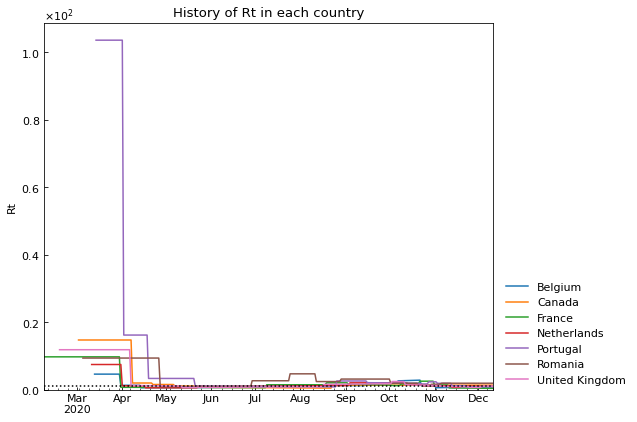

Country,Belgium,Canada,France,Netherlands,Portugal,Romania,United Kingdom
Date,,,,,,,
2020-12-07,0.84,1.35,0.39,0.98,0.95,1.92,1.06
2020-12-08,0.84,1.35,0.39,0.98,0.95,1.92,1.06
2020-12-09,0.84,1.35,0.39,0.98,0.95,1.92,1.06
2020-12-10,0.84,1.35,0.39,0.98,0.95,1.92,1.06
2020-12-11,0.84,1.35,0.39,0.98,0.95,1.92,1.06


In [14]:
analyser.history("Rt", roll_window=None).tail()

### $\rho$: Effective contact rate $\mathrm{[-]}$

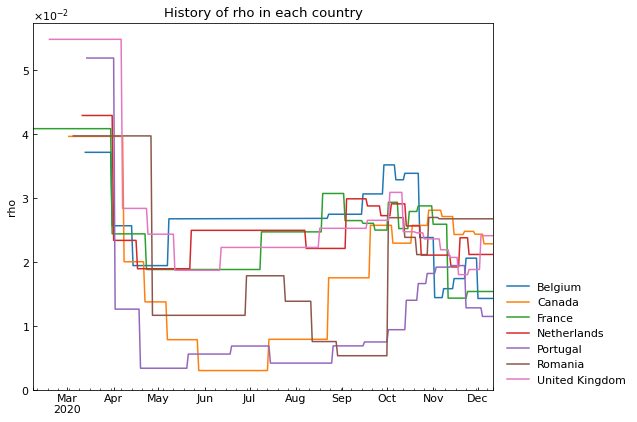

Country,Belgium,Canada,France,Netherlands,Portugal,Romania,United Kingdom
Date,,,,,,,
2020-12-07,0.014252,0.022788,0.015341,0.021125,0.011442,0.026693,0.024057
2020-12-08,0.014252,0.022788,0.015341,0.021125,0.011442,0.026693,0.024057
2020-12-09,0.014252,0.022788,0.015341,0.021125,0.011442,0.026693,0.024057
2020-12-10,0.014252,0.022788,0.015341,0.021125,0.011442,0.026693,0.024057
2020-12-11,0.014252,0.022788,0.015341,0.021125,0.011442,0.026693,0.024057


In [15]:
analyser.history("rho", roll_window=None).tail()

### $\sigma$: Recovery rate $\mathrm{[-]}$

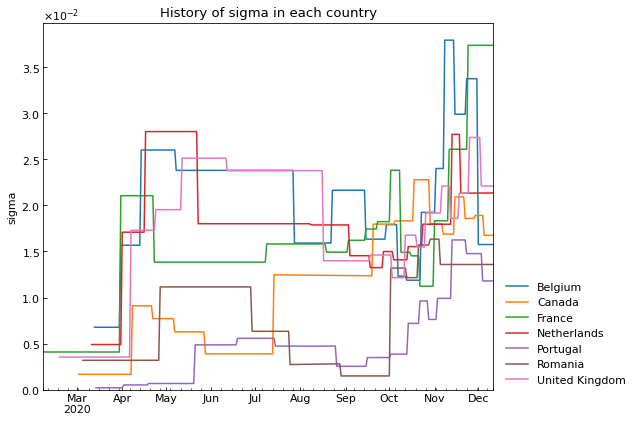

Country,Belgium,Canada,France,Netherlands,Portugal,Romania,United Kingdom
Date,,,,,,,
2020-12-07,0.015756,0.016754,0.037378,0.021355,0.011804,0.013591,0.022112
2020-12-08,0.015756,0.016754,0.037378,0.021355,0.011804,0.013591,0.022112
2020-12-09,0.015756,0.016754,0.037378,0.021355,0.011804,0.013591,0.022112
2020-12-10,0.015756,0.016754,0.037378,0.021355,0.011804,0.013591,0.022112
2020-12-11,0.015756,0.016754,0.037378,0.021355,0.011804,0.013591,0.022112


In [16]:
analyser.history("sigma", roll_window=None).tail()

### $\kappa$: Mortality rate of infected cases $\mathrm{[-]}$

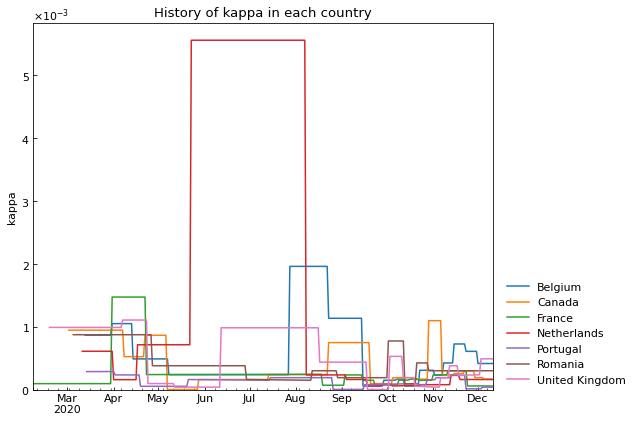

Country,Belgium,Canada,France,Netherlands,Portugal,Romania,United Kingdom
Date,,,,,,,
2020-12-07,0.000417,0.000169,0.000059,0.000162,0.00004,0.000301,0.000491
2020-12-08,0.000417,0.000169,0.000059,0.000162,0.00004,0.000301,0.000491
2020-12-09,0.000417,0.000169,0.000059,0.000162,0.00004,0.000301,0.000491
2020-12-10,0.000417,0.000169,0.000059,0.000162,0.00004,0.000301,0.000491
2020-12-11,0.000417,0.000169,0.000059,0.000162,0.00004,0.000301,0.000491


In [17]:
analyser.history("kappa", roll_window=None).tail()

### $\theta$: Mortality rate of S$^\ast$ cases $\mathrm{[-]}$

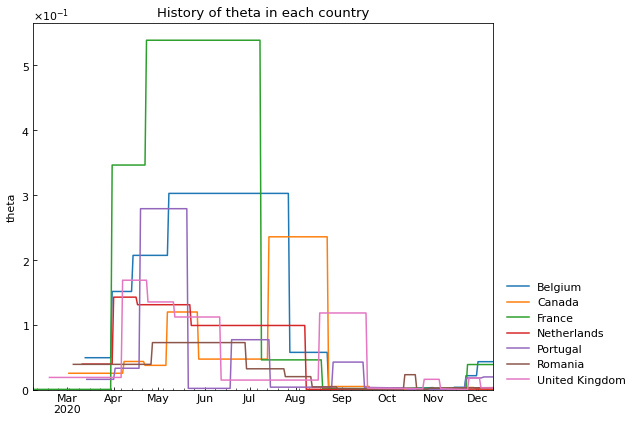

Country,Belgium,Canada,France,Netherlands,Portugal,Romania,United Kingdom
Date,,,,,,,
2020-12-07,0.043189,0.00013,0.038791,0.001146,0.019687,0.003156,0.0028
2020-12-08,0.043189,0.00013,0.038791,0.001146,0.019687,0.003156,0.0028
2020-12-09,0.043189,0.00013,0.038791,0.001146,0.019687,0.003156,0.0028
2020-12-10,0.043189,0.00013,0.038791,0.001146,0.019687,0.003156,0.0028
2020-12-11,0.043189,0.00013,0.038791,0.001146,0.019687,0.003156,0.0028


In [18]:
analyser.history("theta", roll_window=None).tail()

## (Experimental): Relationship of OxCGRT index and parameter values
Government responses will impact on parameter values of ODE models about 14 days later. Here, we will investigate on the relationship of [stringency index (from OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md) and reproduction number/model parameters.


In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
df = analyser.track()
param_cols = ["Rt", *cs.SIRF.PARAMETERS]
oxcgrt_cols = oxcgrt_data.OXCGRT_VARS[:]
cols = param_cols + oxcgrt_cols
delay = 14

for col in param_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df.groupby("Country")[col].shift(0 - delay)

df = df.dropna(how="any")
df = df.loc[:, ["Date", "Country", *cols]]
track_df = df.copy()
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25919 entries, 0 to 26002
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date                                 25919 non-null  datetime64[ns]
 1   Country                              25919 non-null  object        
 2   Rt                                   25919 non-null  float64       
 3   theta                                25919 non-null  float64       
 4   kappa                                25919 non-null  float64       
 5   rho                                  25919 non-null  float64       
 6   sigma                                25919 non-null  float64       
 7   School_closing                       25919 non-null  int64         
 8   Workplace_closing                    25919 non-null  int64         
 9   Cancel_events                        25919 non-null  int64         
 10  Gatherings

In [21]:
# Correlation
df = track_df.copy()
df.corr().style.background_gradient(axis=None)

,Rt,theta,kappa,rho,sigma,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
Rt,1.000000,-0.138758,-0.020745,0.471921,-0.390274,-0.082702,-0.141359,-0.147656,-0.303790,-0.150248,-0.118113,-0.191382,-0.167311,-0.173740,-0.207949,-0.171463,-0.183465
theta,-0.138758,1.000000,0.023200,-0.224740,0.039237,0.247851,0.222912,0.228664,0.189690,0.154160,0.225294,0.276335,0.135140,0.107200,-0.203562,-0.006117,0.318293
kappa,-0.020745,0.023200,1.000000,0.132941,0.090323,-0.054836,0.000861,0.100586,-0.184596,0.054709,-0.061998,-0.068328,0.013235,0.051806,-0.128415,0.132292,-0.103227
rho,0.471921,-0.224740,0.132941,1.000000,-0.224305,-0.360412,-0.395701,-0.153876,-0.465076,-0.172821,-0.293735,-0.063895,-0.569449,-0.302539,-0.545221,-0.135614,-0.458687
sigma,-0.390274,0.039237,0.090323,-0.224305,1.000000,0.172476,0.289718,0.385345,0.468021,0.348152,0.265530,0.427471,0.072156,0.266901,0.009980,0.354901,0.307644
School_closing,-0.082702,0.247851,-0.054836,-0.360412,0.172476,1.000000,0.690782,0.097446,0.426355,0.052811,0.499033,0.144076,0.223941,0.352809,0.065418,-0.088242,0.749757
Workplace_closing,-0.141359,0.222912,0.000861,-0.395701,0.289718,0.690782,1.000000,0.440149,0.581105,0.285472,0.714661,0.320110,0.294946,0.453849,-0.021928,-0.150541,0.847257
Cancel_events,-0.147656,0.228664,0.100586,-0.153876,0.385345,0.097446,0.440149,1.000000,0.547060,0.723719,0.489561,0.704182,-0.034696,0.346617,-0.210887,-0.029173,0.520879
Gatherings_restrictions,-0.303790,0.189690,-0.184596,-0.465076,0.468021,0.426355,0.581105,0.547060,1.000000,0.568115,0.564856,0.656358,0.396328,0.571156,0.295975,0.244759,0.741499
Transport_closing,-0.150248,0.154160,0.054709,-0.172821,0.348152,0.052811,0.285472,0.723719,0.568115,1.000000,0.380261,0.684977,-0.020807,0.290900,-0.085930,0.031231,0.409251


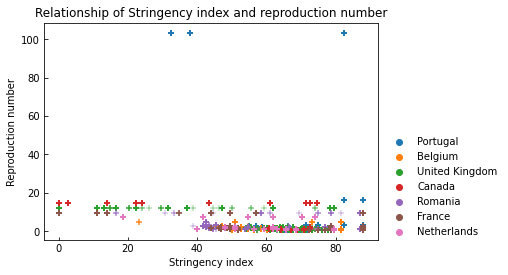

In [22]:
# Scatter plot of Stringency index and Rt
df = track_df.copy()
sns.scatterplot(data=df, x="Stringency_index", y="Rt", hue="Country", legend="brief", marker="+")
bbox_to_anchor=(1.02, 0)
bbox_loc="lower left"
plt.legend(bbox_to_anchor=bbox_to_anchor, loc=bbox_loc, borderaxespad=0)
plt.title("Relationship of Stringency index and reproduction number")
plt.ylabel("Reproduction number")
plt.xlabel("Stringency index")
plt.show()